# Маркетинговый анализ развлекательного приложения Procrastinate Pro+

**Описание проекта:**

Необходимо провести анализ приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

**Цель проекта:**

Разобраться в причинах и помочь компании выйти в плюс и изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

# Структура проекта:

**Шаг 1. Загрузка данных и подготовка к анализу**

**Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии**

Использую функции для расчета и анализа LTV, ROI, удержания и конверсии.

**Шаг 3. Исследовательский анализ данных**

Необходимо построить профили пользователей. Определить минимальную и максимальную дату привлечения пользователей.

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

**Шаг 4. Маркетинг**

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

**Шаг 5. Оценка окупаемости рекламы для привлечения пользователей**

С помощью LTV и ROI:
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.

Описание обнаруженных проблем. Необходимо ответить на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Описание возможных причины обнаруженных проблем и формирование рекомендации для рекламного отдела. При решении этого шага буду считать, что я смотрю данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Оценить целесообразность включения в анализ органических пользователей.

**Шаг 6. Общий вывод**
- Формирование причин неэффективности привлечения пользователей;
- Формирование рекомендаций для отдела маркетинга для повышения эффективности.

**Оглавление:**

1. [Импорт библиотек](#section_id1)

2. [Функции для расчёта и анализа LTV, ROI](#section_id2)

3. [Исследовательский анализ данных](#section_id3)

4. [Маркетинг](#section_id4)

5. [Окупаемость рекламной кампании](#section_id5)

6. [Общий вывод](#section_id6)

## Импорт библиотек и загрузка данных
<a id='section_id1'></a>

In [1]:
# Импортирую библиотеки:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import copy
import matplotlib.pyplot as plt

In [2]:
# Причёсываю формат отображения данных - отображение всех колонок и ограничиваю количество знаков после запятой
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
# Чтение исходных данных
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv'),
)

### Обзор данных
<a id='section_id1'></a>

#### `visits`

In [4]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [5]:
visits.tail()

User Id   Region Device         Channel        Session Start  \
309896  329994900775       UK     PC         LeapBob  2019-10-31 13:28:12   
309897  334903592310   France     PC  lambdaMediaAds  2019-10-31 22:14:52   
309898  540102010126  Germany     PC         organic  2019-10-31 01:40:48   
309899  308736936846  Germany    Mac         organic  2019-10-31 07:37:34   
309900  109329042535  Germany     PC  lambdaMediaAds  2019-10-31 14:17:43   

                Session End  
309896  2019-10-31 14:39:29  
309897  2019-10-31 22:39:36  
309898  2019-10-31 01:41:31  
309899  2019-10-31 07:37:55  
309900  2019-10-31 15:17:04

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


#### `orders`

In [7]:
orders.head(5)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52    4.990
1  174361394180  2019-05-01 12:24:04    4.990
2  529610067795  2019-05-01 11:34:04    4.990
3  319939546352  2019-05-01 15:34:40    4.990
4  366000285810  2019-05-01 13:59:51    4.990

In [8]:
orders.tail(5)

User Id             Event Dt  Revenue
40207  651604369137  2019-10-31 16:19:07    4.990
40208  275341387049  2019-10-31 01:17:17    4.990
40209  374656616484  2019-10-31 06:17:29    4.990
40210  168548862926  2019-10-31 22:46:19    4.990
40211  329994900775  2019-10-31 13:29:06    4.990

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


#### `costs`

In [10]:
costs.head(5)

dt   Channel   costs
0  2019-05-01  FaceBoom 113.300
1  2019-05-02  FaceBoom  78.100
2  2019-05-03  FaceBoom  85.800
3  2019-05-04  FaceBoom 136.400
4  2019-05-05  FaceBoom 122.100

In [11]:
costs.tail(5)

dt         Channel  costs
1795  2019-10-23  lambdaMediaAds  4.000
1796  2019-10-24  lambdaMediaAds  6.400
1797  2019-10-25  lambdaMediaAds  8.800
1798  2019-10-26  lambdaMediaAds  8.800
1799  2019-10-27  lambdaMediaAds 12.000

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице `visits` необходимо:
* привести все названия колонок к нижнему регистру, заменить пробелы на "_"
* изменить формат данных в колонках `Session Start` и `Session End` с object на datetime

В таблице `orders` необходимо:
* привести все названия колонок к нижнему регистру, заменить пробелы на "_"
* изменить формат данных в колонках `Event Dt` с object на datetime

В таблице `costs` необходимо:
* привести все названия колонок к нижнему регистру

### Предобработка данных
<a id='section_id2'></a>

In [13]:
# Приведу все названия колонок к нижнему регистру:
visits.columns = visits.columns.str.lower()

# Переименую названия колонок
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

# Преобразую колонки с датами в нужный формат
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

#Проверка предобработки
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
# Проверка на явные дубликаты
visits.duplicated().sum()

0

In [15]:
# Приведу все названия колонок к нижнему регистру:
costs.columns = costs.columns.str.lower()

# Преобразую колонки с датами в нужный формат
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#Проверка предобработки
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
# Проверка на явные дубликаты
costs.duplicated().sum()

0

In [17]:
# Приведу все названия колонок к нижнему регистру:
orders.columns = orders.columns.str.lower()

# Переименую названия колонок
orders.columns = ['user_id', 'event_dt', 'revenue']

# Преобразую колонки с датами в нужный формат
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#Проверка предобработки
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [18]:
# Проверка на явные дубликаты
orders.duplicated().sum()

0

**Вывод:**

Предобработка проведена, названия столбцов приведены к нижнему регистру, пробелы заменены на нижнее подчёркивание, преобразованы типы данных в отдельных колонках, явных дубликатов нет, можно приступать к анализу данных.

## Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии
<a id='section_id2'></a>

### get_profiles - пользовательские профили

In [19]:
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе, поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### get_retention - функция удержания

In [20]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляю столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаю пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираю «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаю таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаю таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаю обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_conversion - функция конверсии

In [21]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаю пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяю дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавля дюанные о покупках в профили
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')

    # рассчитываю лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группирую по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делю каждую «ячейку» в строке на размер когорты и получаю conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаю таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираю 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаю таблицу динамики конверсии
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаю обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_ltv - функция расчёта LTV, ROI

In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаю пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляю данные о покупках в профили
    result_raw = result_raw.merge(orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    # рассчитываю лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    # группирую по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строю «треугольную» таблицу выручки
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        # нахожу сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляю размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяю размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаю LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаю все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаю размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираю датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаю средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаю ROI: делю LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляю строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаю размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляю CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляю размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаю таблицы LTV и ROI
        return result, roi

    # получаю таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблиц динамики убираю 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаю таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### filter_data - функция сглаживания фрейма

In [23]:
def filter_data(df, window):
    # для каждого столбца применяю скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функции визуализации данных - удержания, конверсии, LTV, ROI

In [24]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show() 

In [25]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

## Проведите исследовательский анализ данных
<a id='section_id3'></a>

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Пользовательские профили. 

Минимальная и максимальная даты привлечения пользователей.

In [27]:
# Построю профили пользователей:
profiles = get_profiles(visits, orders, costs)

#момент анализа
observation_date = profiles['dt'].max()

#горизонт анализа, в описании указано, окупаемость должна наступать не позднее чем через 2 недели
horizon_days = 14

print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [28]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

### Пользователи в разрезе стран

Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

region  user_id  payer
0  United States   100002  0.069
1        Germany    14981  0.041
2             UK    17575  0.040
3         France    17450  0.038

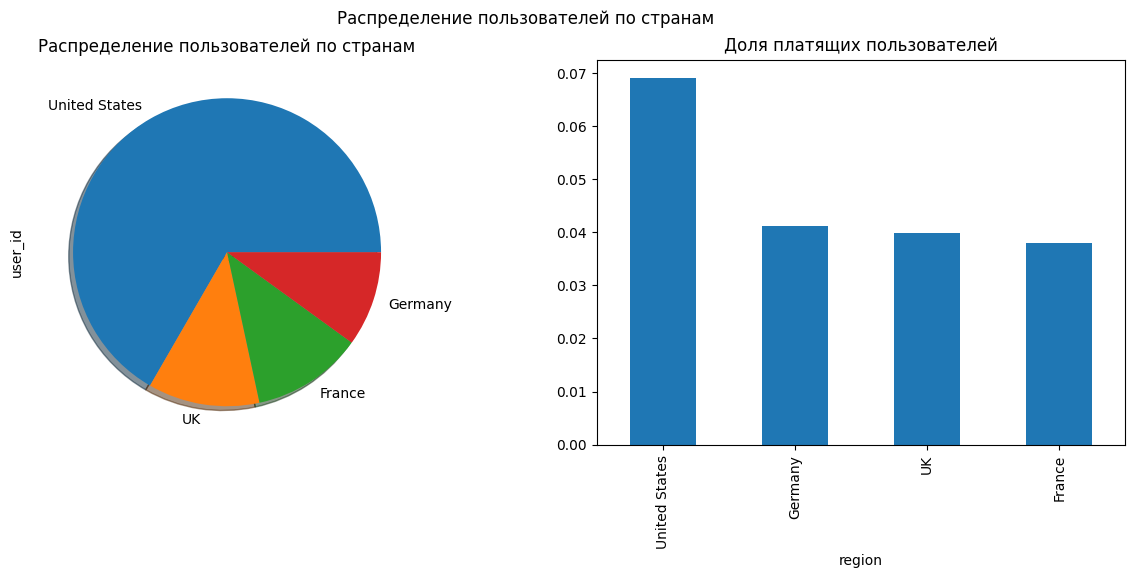

In [29]:
display(profiles.groupby('region').agg({'user_id':'nunique', 'payer': 'mean'})
                .sort_values(by='payer', ascending=False).reset_index())

# Построю графики для визуализации данных
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Распределение пользователей по странам')

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)\
    .plot(kind='pie', ax = ax_1, subplots=True, legend=False, shadow=True)
profiles.groupby('region').agg({'payer':'mean'})\
    .sort_values(by='payer', ascending=False).plot(kind='bar', ax = ax_2, legend=False)

ax_1.set(title = 'Распределение пользователей по странам')
ax_2.set(title = 'Доля платящих пользователей')
plt.show()

**Вывод:**

Пользователи приходят в приложение из 4 стран: США, Великобритания, Франция и Германия. Наибольшее количетсво пользователей - из США, также пользователи из штатов лидируют по доле платящих пользователей. Доля платящих пользователей из Великобритании и Франции почти в 2 раза ниже, чем из США.

В задании не указана валюта расходов, так как более половины пользователей из США, буду использовать доллар США в качестве обозначения валюты.

### Пользователи в разрезе утройств

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

device  user_id  payer
0      Mac    30042  0.064
1   iPhone    54479  0.062
2  Android    35032  0.059
3       PC    30455  0.050

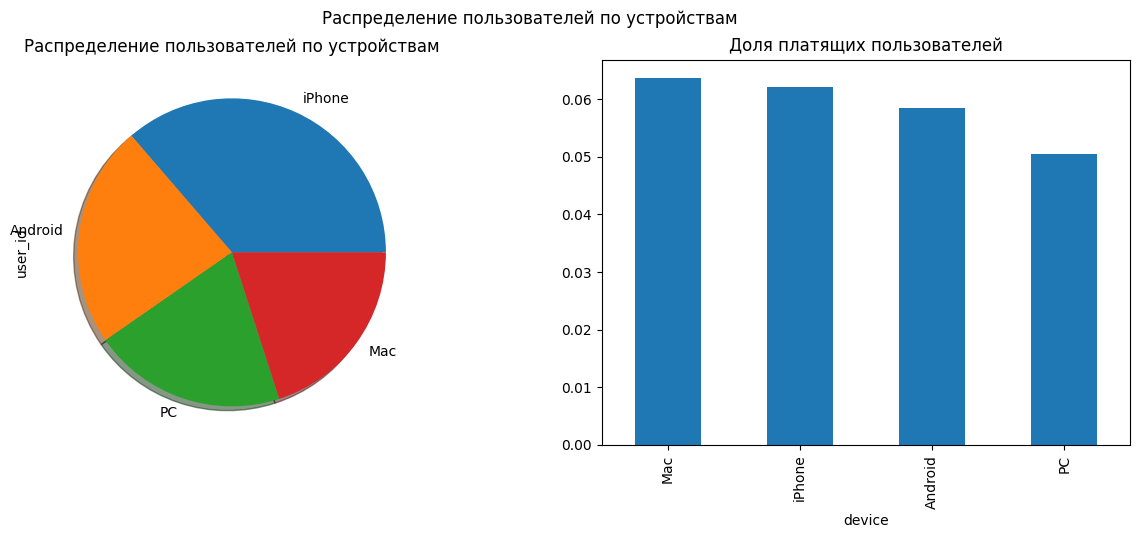

In [30]:
display(profiles.groupby('device').agg({'user_id':'nunique', 'payer': 'mean'})
                .sort_values(by='payer', ascending=False).reset_index())

# Построю графики для визуализации данных
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Распределение пользователей по устройствам')

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)\
    .plot(kind='pie', ax = ax_1, subplots=True, legend=False, shadow=True)
profiles.groupby('device').agg({'payer':'mean'})\
    .sort_values(by='payer', ascending=False).plot(kind='bar', ax = ax_2, legend=False)

ax_1.set(title = 'Распределение пользователей по устройствам')
ax_2.set(title = 'Доля платящих пользователей')
plt.show()

**Вывод:**

Пользователи пользуются 4 типами устройств - iPhone, Android, Mac и PC. Наибольшее количество пользователей пользуются iPhone - 54 479 чел., наибольшая доля платящих пользователей заходят с Mac - 6.4%, далее с небольшим отставанием следует iPhone.

### Пользователи в разрезе каналов привлечения

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

channel  user_id  payer
0             FaceBoom    29144  0.122
1           AdNonSense     3880  0.113
2       lambdaMediaAds     2149  0.105
3               TipTop    19561  0.096
4       RocketSuperAds     4448  0.079
5       WahooNetBanner     8553  0.053
6              YRabbit     4312  0.038
7         MediaTornado     4364  0.036
8              LeapBob     8553  0.031
9   OppleCreativeMedia     8605  0.027
10             organic    56439  0.021

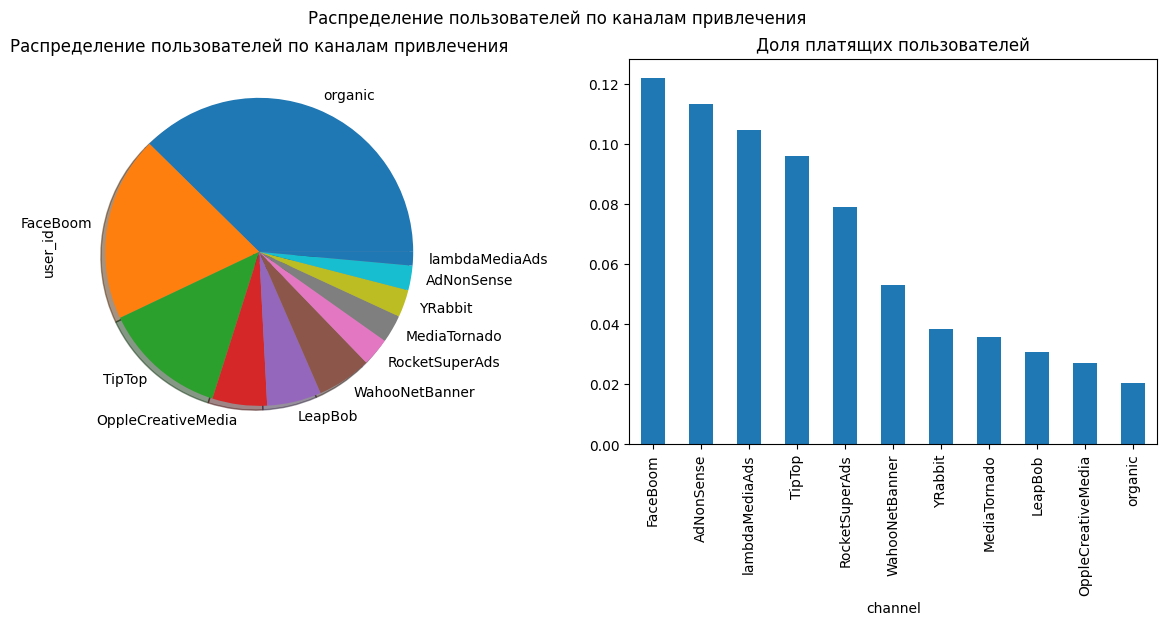

In [31]:
display(profiles.groupby('channel').agg({'user_id':'nunique', 'payer': 'mean'})
                .sort_values(by='payer', ascending=False).reset_index())

# Построю графики для визуализации данных
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Распределение пользователей по каналам привлечения')

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)\
    .plot(kind='pie', ax = ax_1, subplots=True, legend=False, shadow=True)
profiles.groupby('channel').agg({'payer':'mean'})\
    .sort_values(by='payer', ascending=False).plot(kind='bar', ax = ax_2, legend=False)

ax_1.set(title = 'Распределение пользователей по каналам привлечения')
ax_2.set(title = 'Доля платящих пользователей')
plt.show()

**Вывод:**

Приложение использует 10 каналов для привлечения пользователей и 11-ый канал - органические пользователи, которые пришли в приложение сами.
Канал-лидер как по числу, так и по доле платящих пользователей - FaceBoom с 29 тыс. пользователями и долей платящих в 12%, ещё один крупный канал привлечения пользователей - TipTop, однако он несколько проигрывает в доле платящих клиентов двум другим каналам с меньшим числом привлечённых юзеров.

Примечательно, что примерно треть пользователей пришла в приложение сама, компания не потратила деньги на их привлечение. Но и доля платящих пользователей из этой категории самая низкая.

## Маркетинг
<a id='section_id4'></a>

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Расходы на маркетинг

Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.

In [32]:
print('Общая сумма расходов на маркетинг: {:.2f}'.format(costs['costs'].sum()))

# Распределение затрат на маркетинг по источникам привлечения:
costs_grp = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
costs_grp['costs_share'] = costs_grp['costs'] / costs_grp['costs'].sum()
costs_grp

Общая сумма расходов на маркетинг: 105497.30


channel      costs  costs_share
0              TipTop 54,751.300        0.519
1            FaceBoom 32,445.600        0.308
2      WahooNetBanner  5,151.000        0.049
3          AdNonSense  3,911.250        0.037
4  OppleCreativeMedia  2,151.250        0.020
5      RocketSuperAds  1,833.000        0.017
6             LeapBob  1,797.600        0.017
7      lambdaMediaAds  1,557.600        0.015
8        MediaTornado    954.480        0.009
9             YRabbit    944.220        0.009

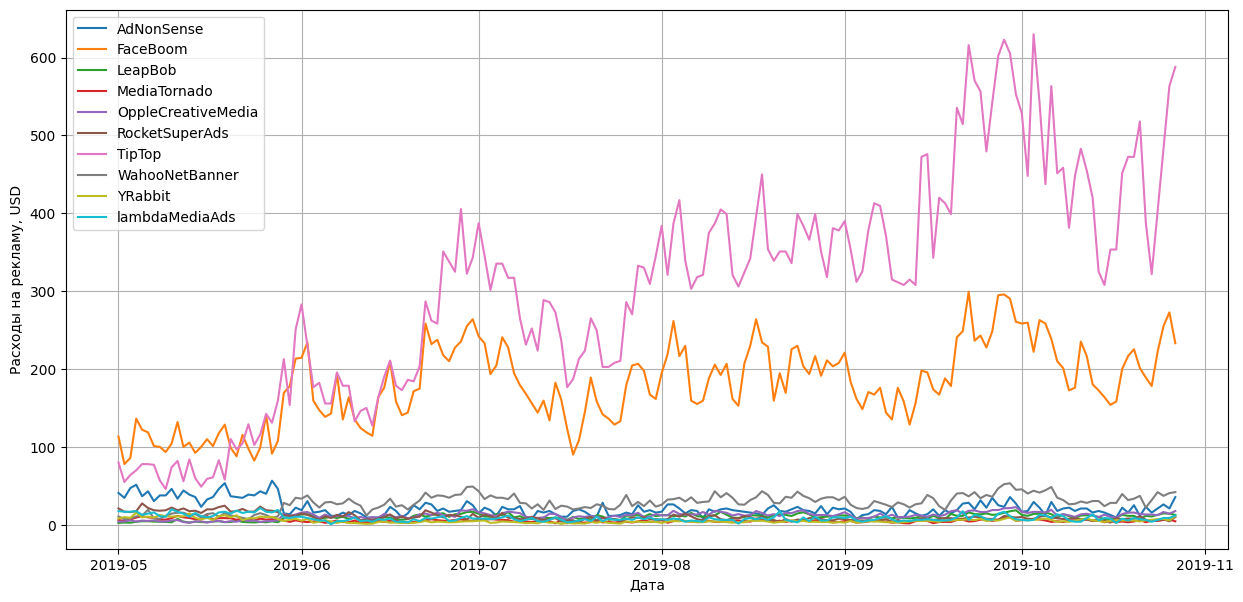

In [33]:
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Расходы на рекламу, USD')
plt.show()

**Вывод:**

Итого на маркетинг компания потратила 105 497 долларов, из них ~82% приходятся на 2 источника - TipTop и FaceBoom.

На графике динамики расходов на маркетинг отражено лидерство двух рекламных каналов. Два канала-лидера имеют схожие тренды по маркетинговым расходам. 

### Привлечение одного пользователя

Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника:
Рассчитайте средний CAC на одного пользователя для **всего проекта** и **для каждого источника трафика**. Используйте профили пользователей.

При расчёте САС на одного пользователя исключю органических юзеров, так как рекламный бюджет не расходовался на их привлечение.

In [34]:
# CAC на одного пользователя всего проекта без учёта органических пользователей:
print('CAC на одного пользователя: {:.2f}'.format(profiles['acquisition_cost'].sum() / 
                                                  profiles.query('channel != "organic"')['user_id'].nunique()))


CAC на одного пользователя: 1.13


In [35]:
# Сгруппирую датафрейм по каналам и посчитаю число уникальных пользователей и затраты на маркетинг в разрезе каналов:
cac = profiles.groupby('channel').agg({'user_id':'nunique', 'acquisition_cost':'sum'}).reset_index()

# Посчитаю стоимость привлечения пользователя в разрезе каждого источника:
cac['cost_per_user'] = cac['acquisition_cost'] / cac['user_id']
cac.sort_values(by='cost_per_user', ascending=False)

channel  user_id  acquisition_cost  cost_per_user
6               TipTop    19561        54,751.300          2.799
1             FaceBoom    29144        32,445.600          1.113
0           AdNonSense     3880         3,911.250          1.008
9       lambdaMediaAds     2149         1,557.600          0.725
7       WahooNetBanner     8553         5,151.000          0.602
5       RocketSuperAds     4448         1,833.000          0.412
4   OppleCreativeMedia     8605         2,151.250          0.250
8              YRabbit     4312           944.220          0.219
3         MediaTornado     4364           954.480          0.219
2              LeapBob     8553         1,797.600          0.210
10             organic    56439             0.000          0.000

**Вывод:**

Средний CAC на одного пользователя по всему проекту без учёта органических клиентов составляет 1.13 USD. При анализе стоимости привлечения одного пользователя выявлено, что САС канала TipTop превышает средний уровень более чем в 2 раза. Стоимость привлечения клиентов во всех остальных каналах ниже среднего значения.

Важно заметить - высокий САС не гарантирует высокую конвертацию в платящих пользователей.

## Оцените окупаемость рекламы для привлечения пользователей
<a id='section_id5'></a>

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Общая окупаемость рекламы

Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для дальнейшего анализа исключю из профилей органических пользователей.

In [36]:
# Создам отдельную переменную:
profiles_wo_org = copy.deepcopy(profiles)

# Исключаю органических пользователей:
profiles_wo_org = profiles_wo_org.loc[profiles_wo_org['channel'] != 'organic']

# Проверю, что остались каналы без органических юзеров: 
profiles_wo_org['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

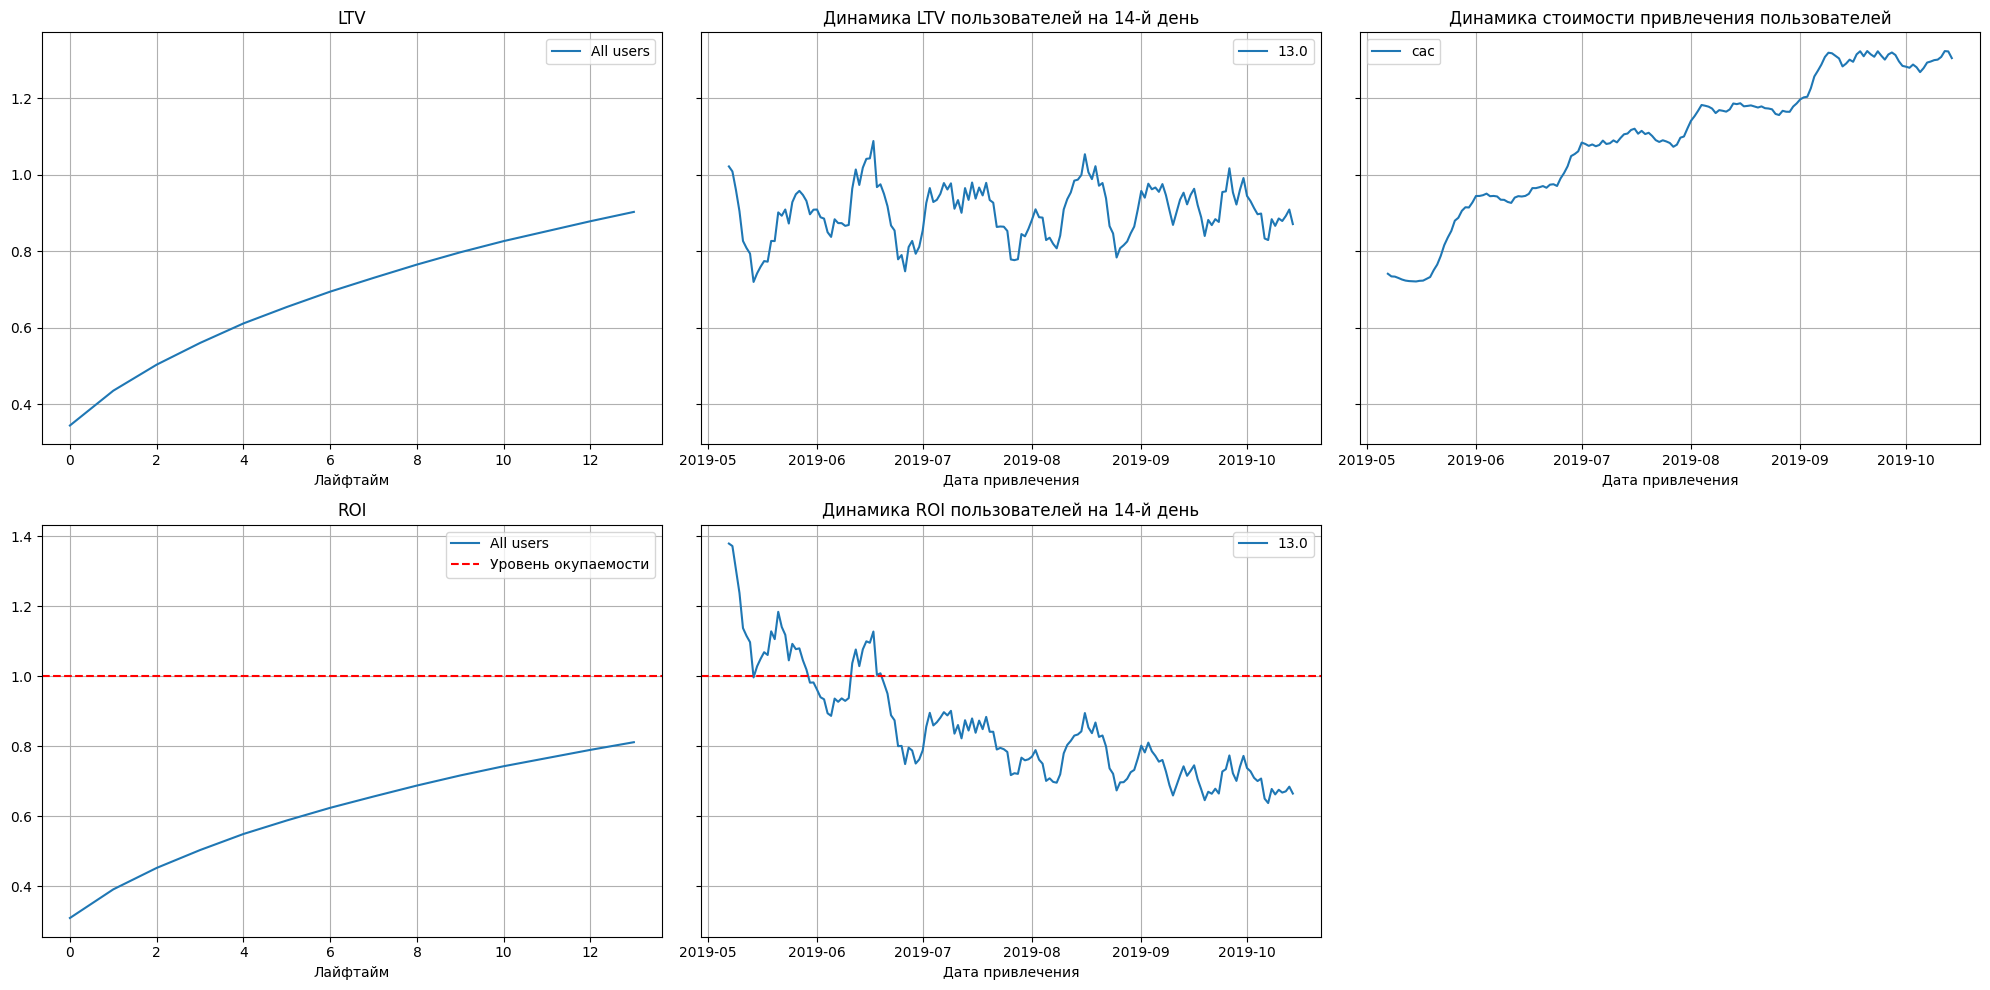

In [37]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**
* LTV колеблется в пределах одного интервала, есть схожая динамика - к концу месяца LTV падает, затем снова растёт. Но такая динамика сохраняется на всём периоде, значит дело не в ухудшении качества пользователей;
* CAC растёт. Дело в увеличении рекламного бюджета;
* Реклама не окупается. ROI в конце второй недели — не достигает уровня окупаемости;
* ROI в динамике снижается, это связано с увеличением расходов на рекламу.

Чтобы разобраться в причинах, пройду по всем доступным характеристикам пользователей — устройству, стране и источнику первого посещения.

### Окупаемость рекламы по устройствам

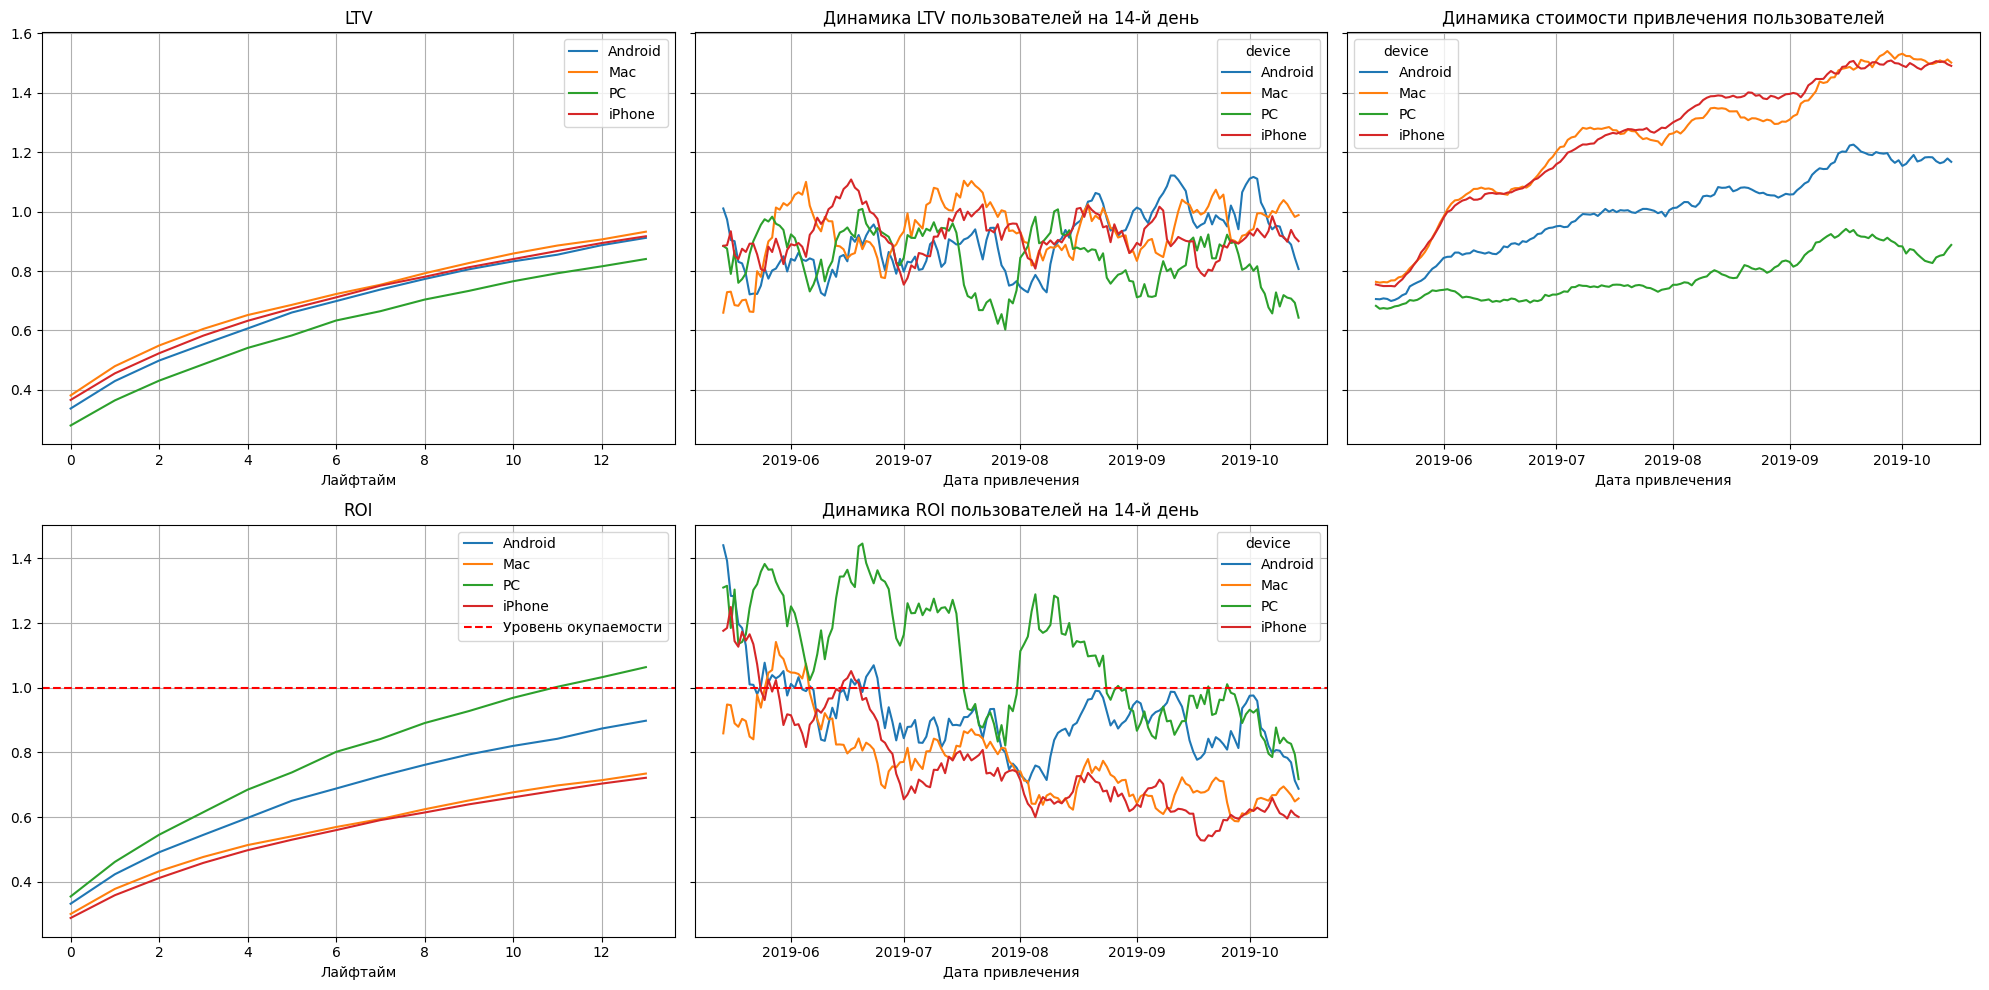

In [38]:
# Добавляю измерение device
dimensions = ['device']

# Собираю данные для графиков с помощью функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions)

# Строю графики:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

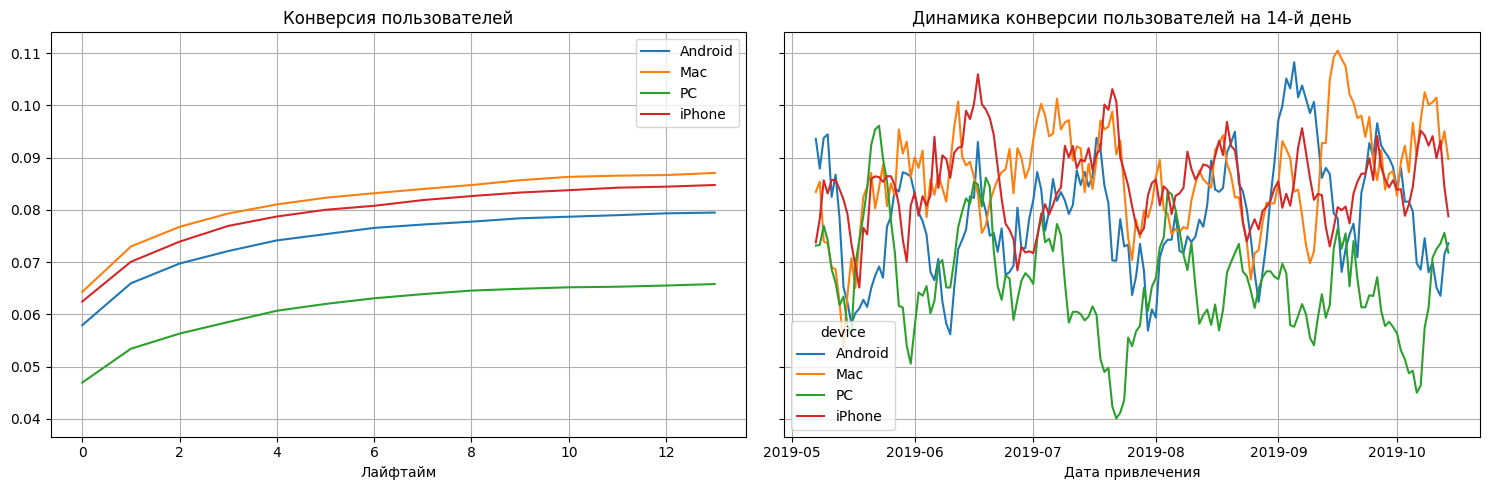

In [39]:
# Проанализирую конверсию в разрезе устройств
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

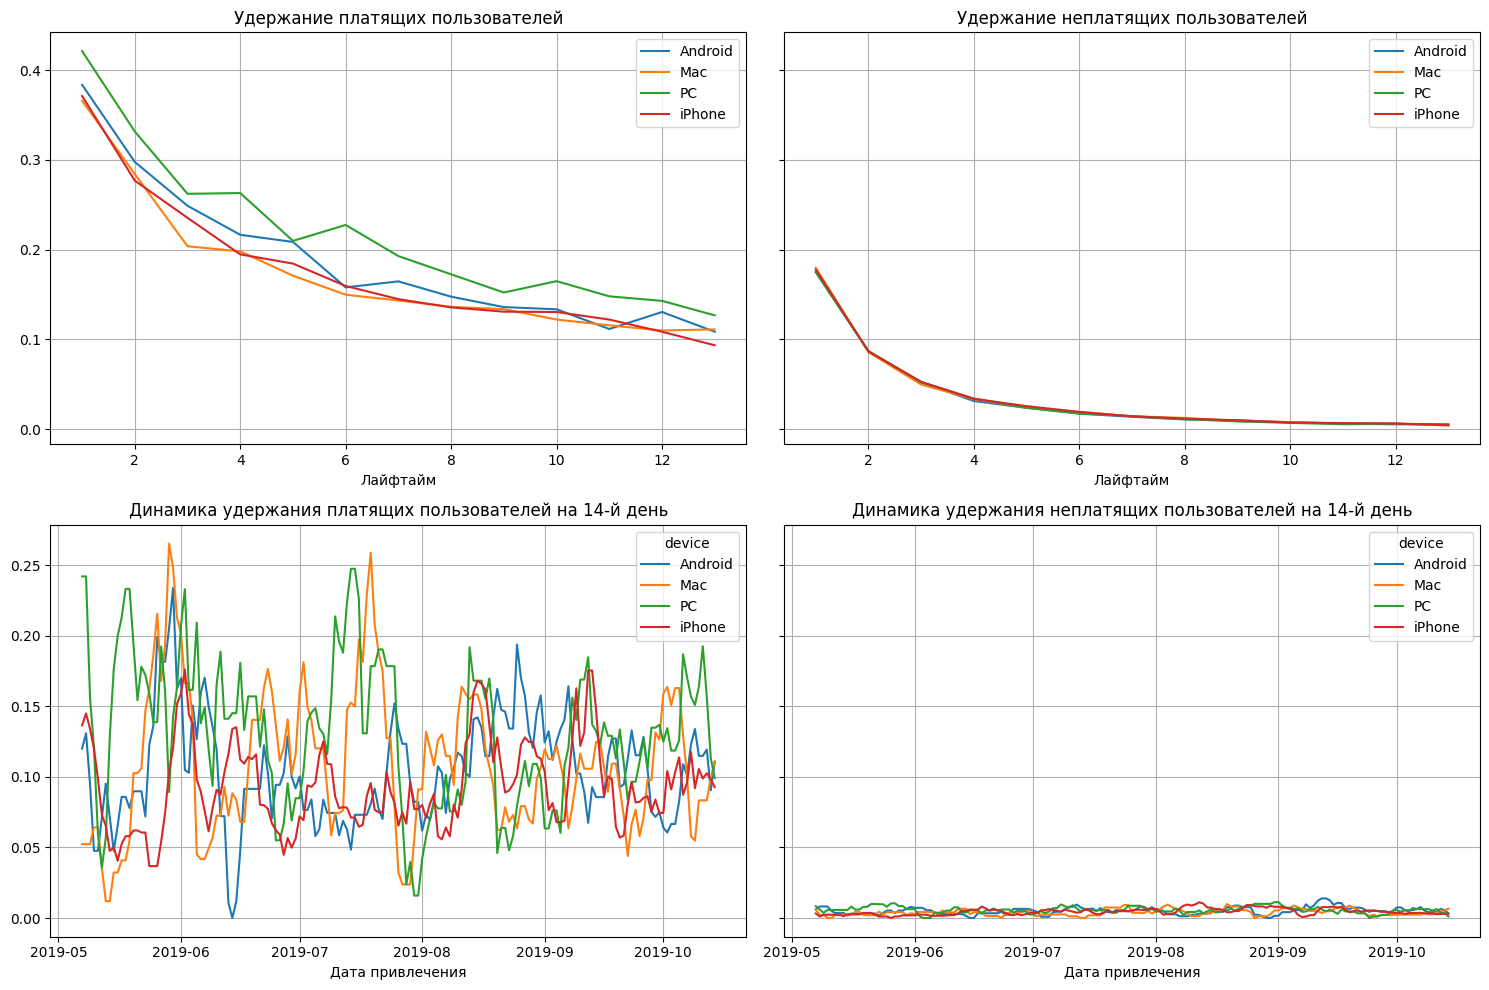

In [40]:
# Проанализирую конверсию в разрезе устройств
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**
* LTV колеблется в пределах одного интервала, есть схожая динамика - к концу месяца LTV падает, затем снова растёт. Но такая динамика сохраняется на всём периоде, значит дело не в ухудшении качества пользователей;
* Разбивка по устройствам показала, что маркетинговые расходы на устройствах iPhone и Mac сильно растут расходы на Android растут, но медленнее, а также они не окупаются;
* CAC растёт. Дело в увеличении рекламного бюджета;
* Реклама на iPhone, Mac и Android не окупается, ROI в конце второй недели по первым двум устройствам на уровне 75%, ROI по Android на уровне 90%, только PC пересекает уровень окупаемости;
* ROI в динамике снижается, это также связано с увеличением расходов на рекламу;
* Коверсия пользователей iPhone и Mac выше двух других устройств, но удержание чуть хуже. 

### Окупаемость рекламы по странам

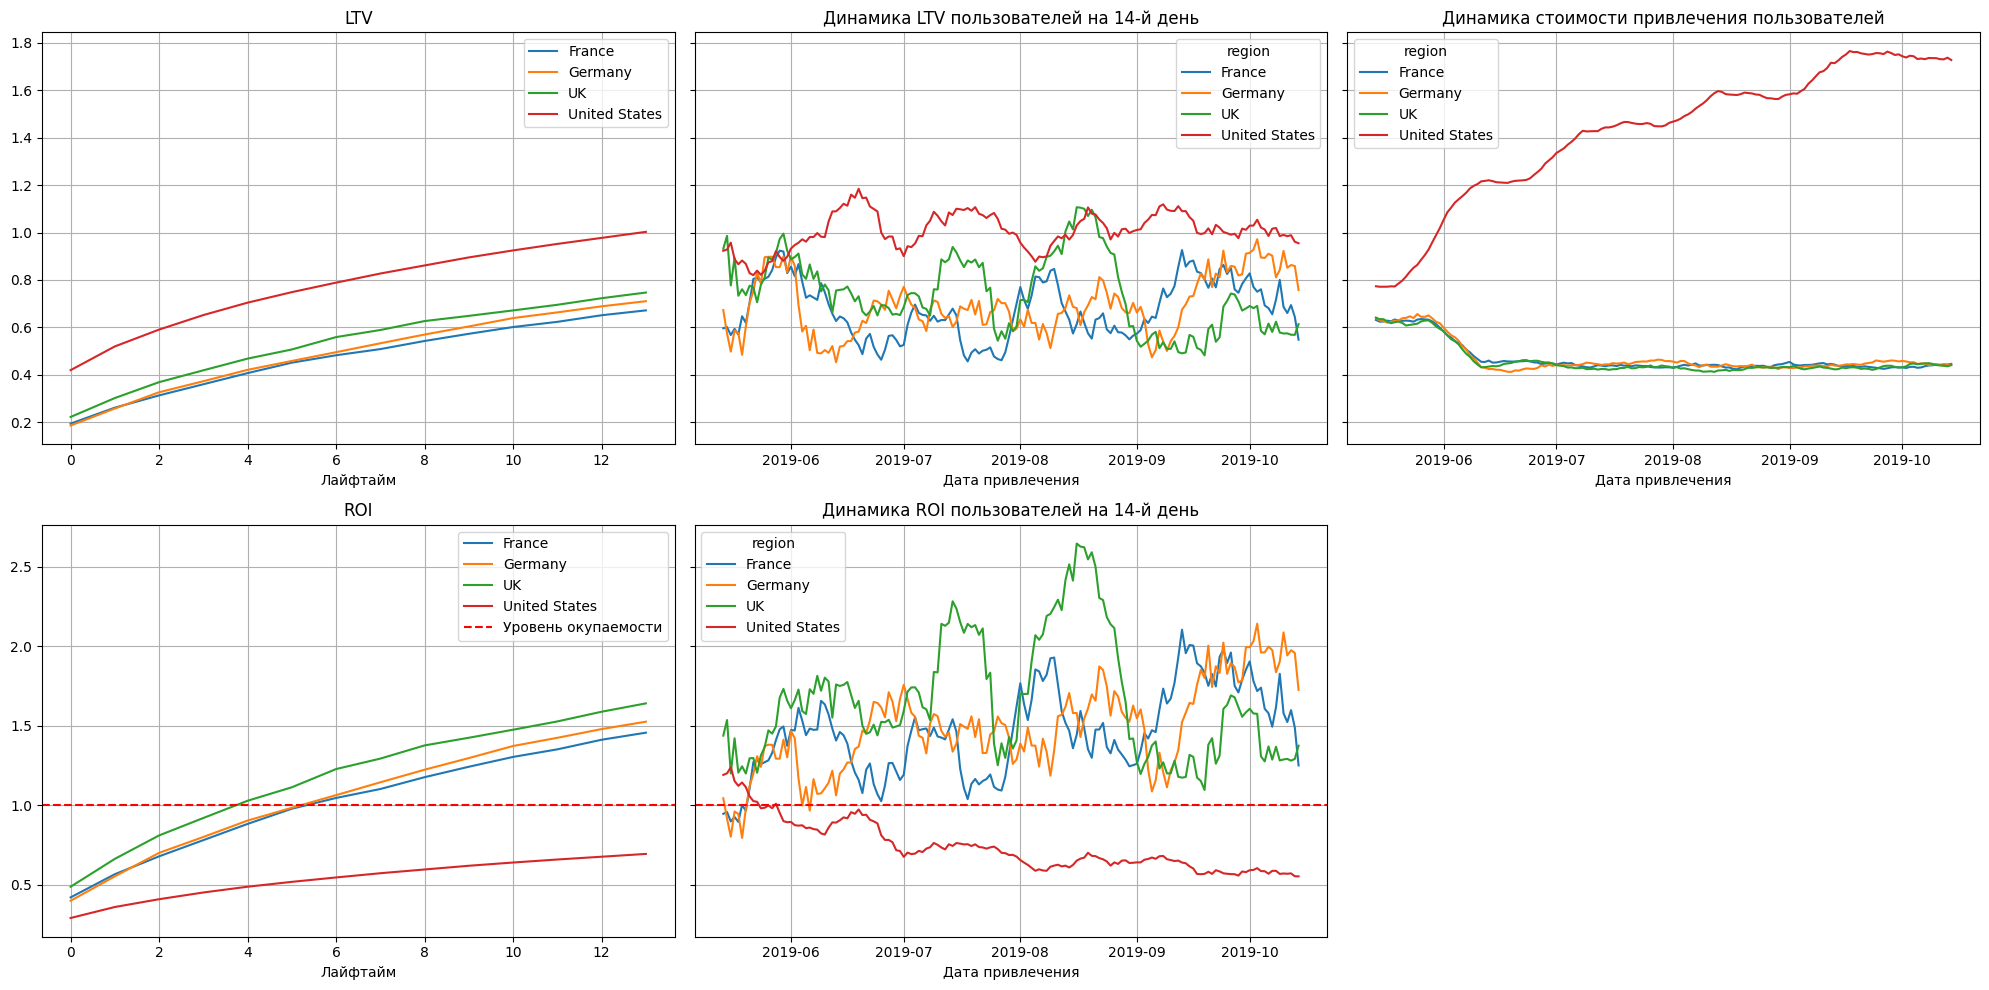

In [41]:
# Добавляю измерение region
dimensions = ['region']

# Собираю данные для графиков с помощью функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions)

# Строю графики:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

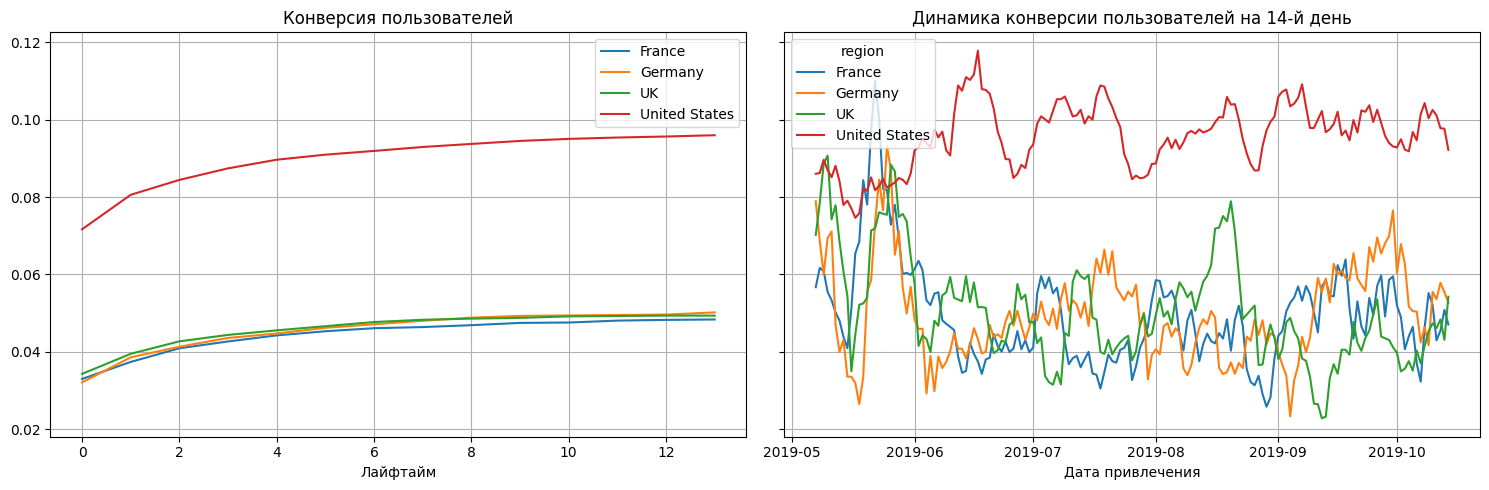

In [42]:
# Проанализирую конверсию в разрезе стран
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

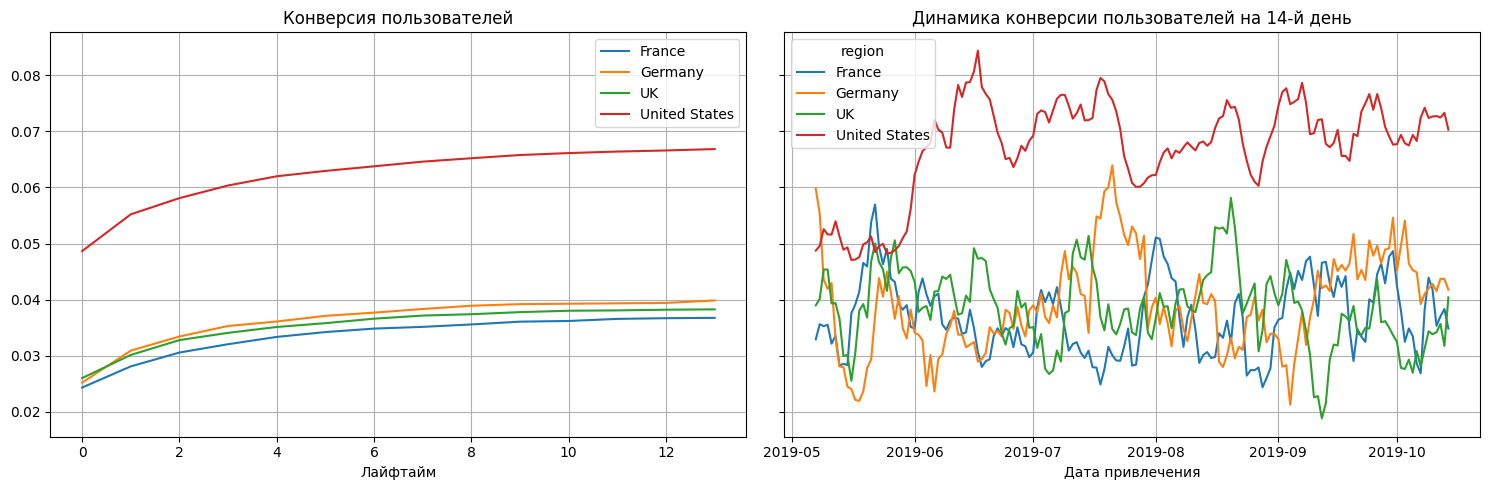

In [43]:
# Проанализирую конверсию в разрезе устройств
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

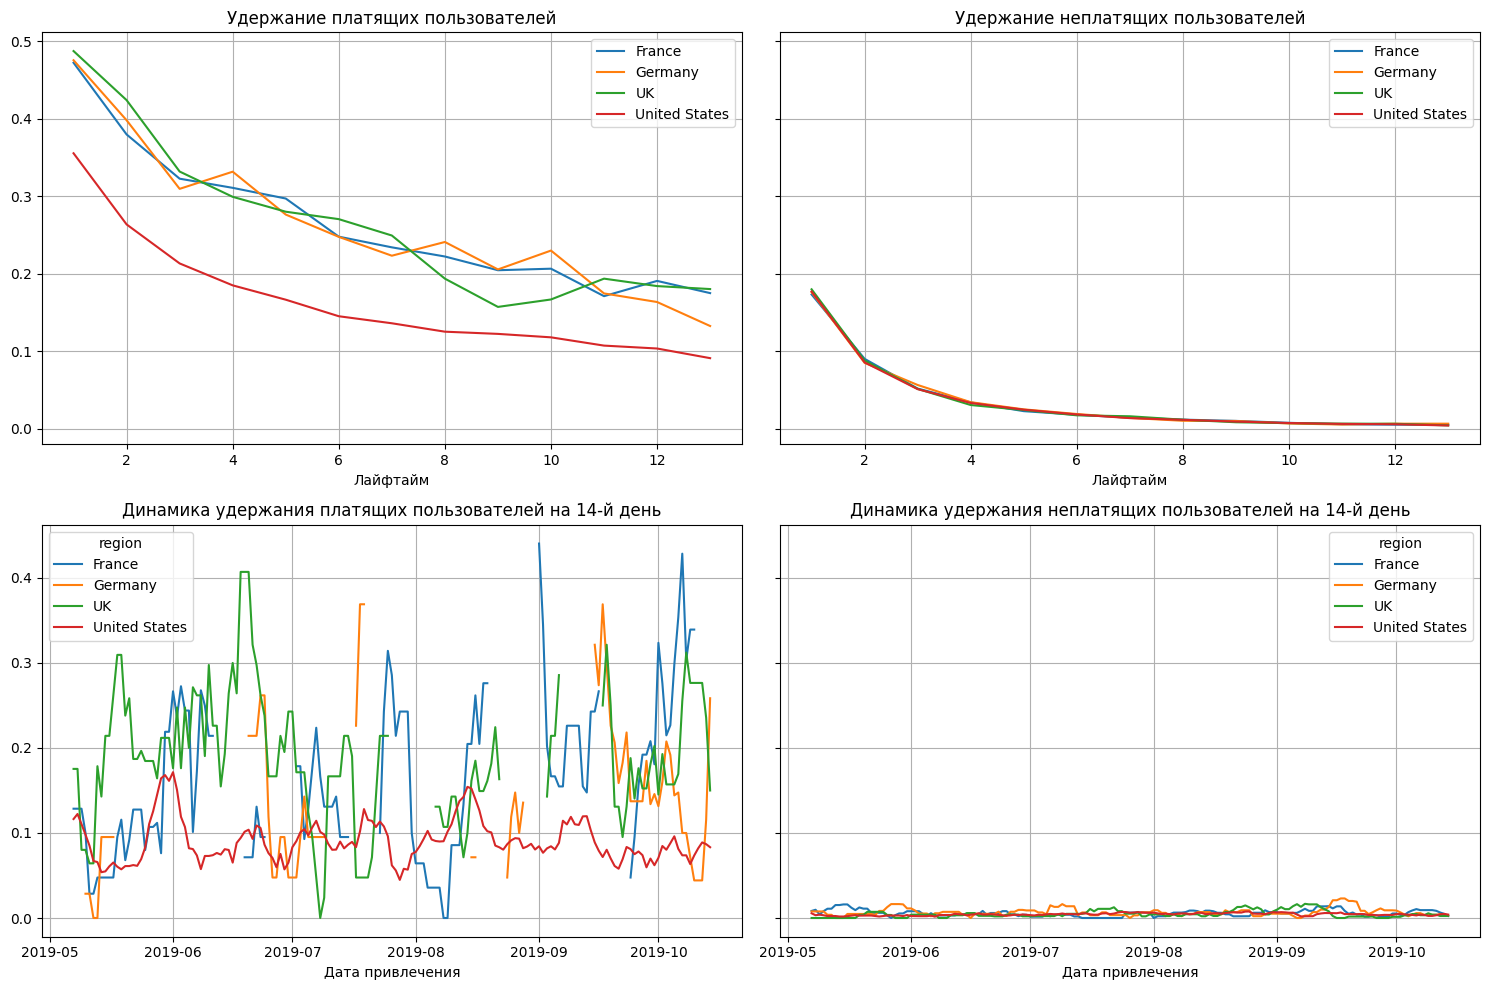

In [44]:
# Проанализирую конверсию в разрезе стран
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**
* Разбивка по странам показывает рост расходов на рекламу (САС) в США. Увеличение рекламного бюджета в этой стране тянет вниз экономику всего проекта;
* ROI в конце второй недели в США около 70%, при том, что 3 другие страны выходят в плюс (150%-160%);
* ROI в динамике снижается в США, по всем другим странам на протяжении всего наблюдаемого периода выше купаемости;
* Конверсия пользователей США гораздо выше пользователей из других стран, но удержание несколько хуже. При том, что удержание за период колеблется в одном коридоре.

### Окупаемость рекламы по рекламным каналам

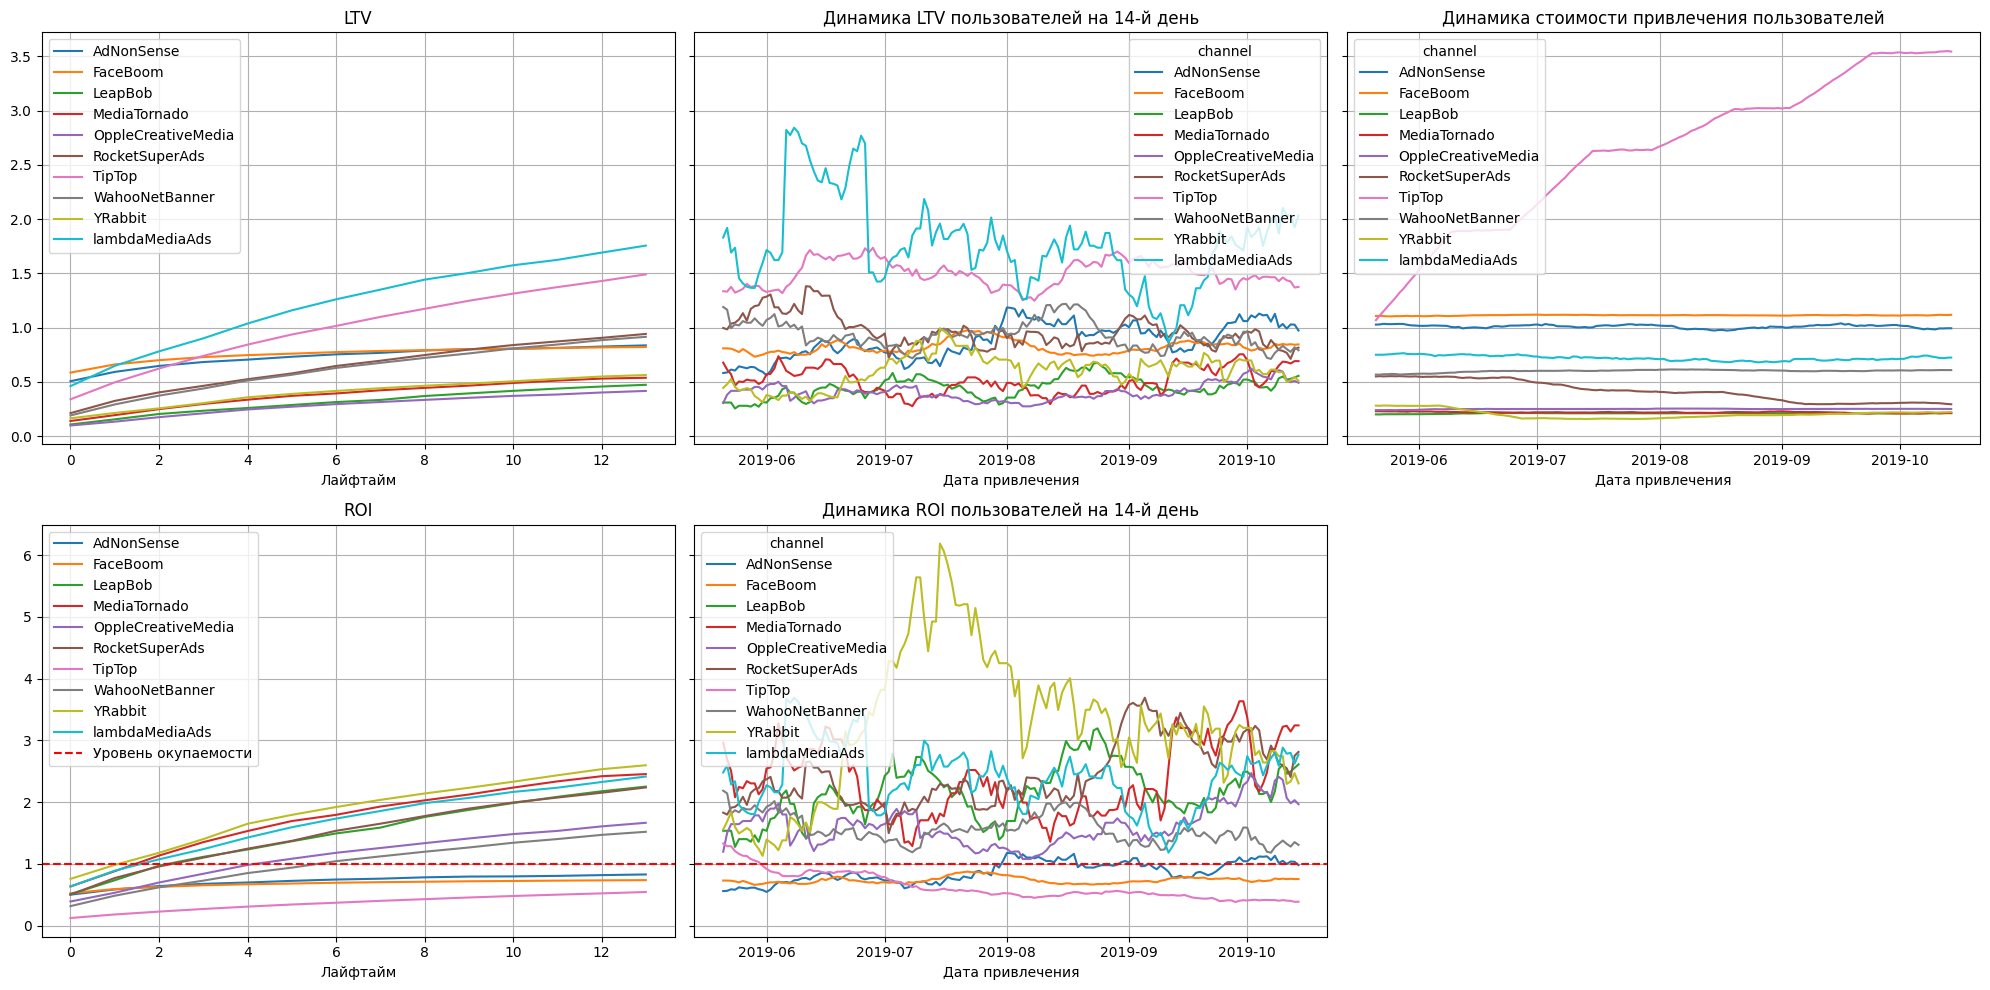

In [45]:
# Добавляю измерение channel
dimensions = ['channel']

# Собираю данные для графиков с помощью функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions)

# Строю графики:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21)

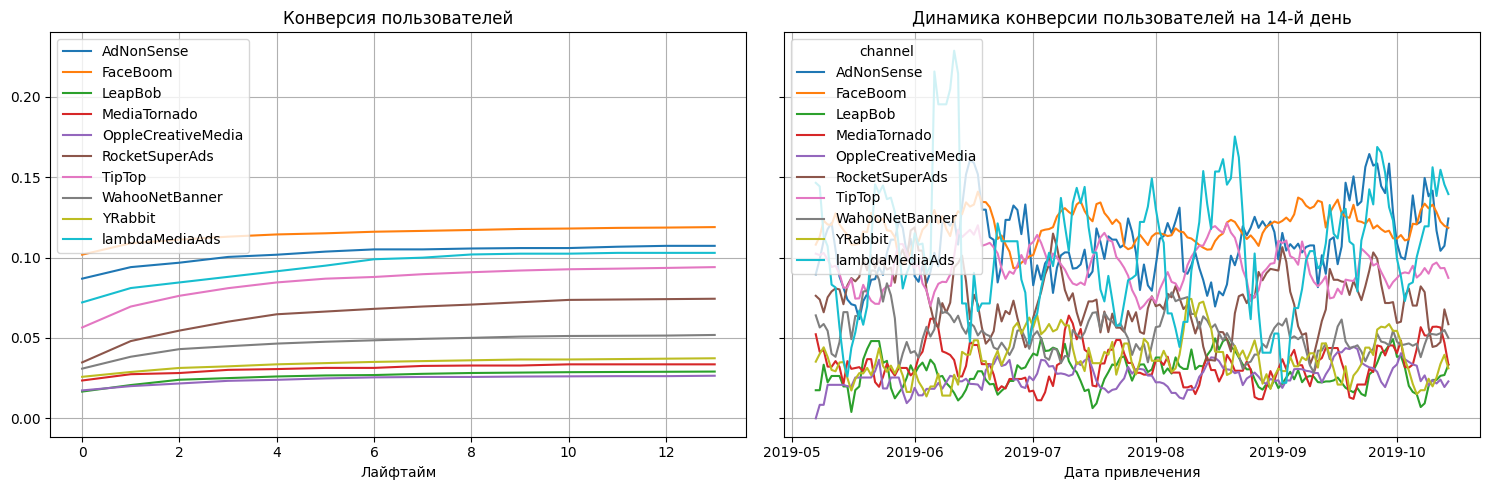

In [46]:
# Проанализирую конверсию в разрезе каналов
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

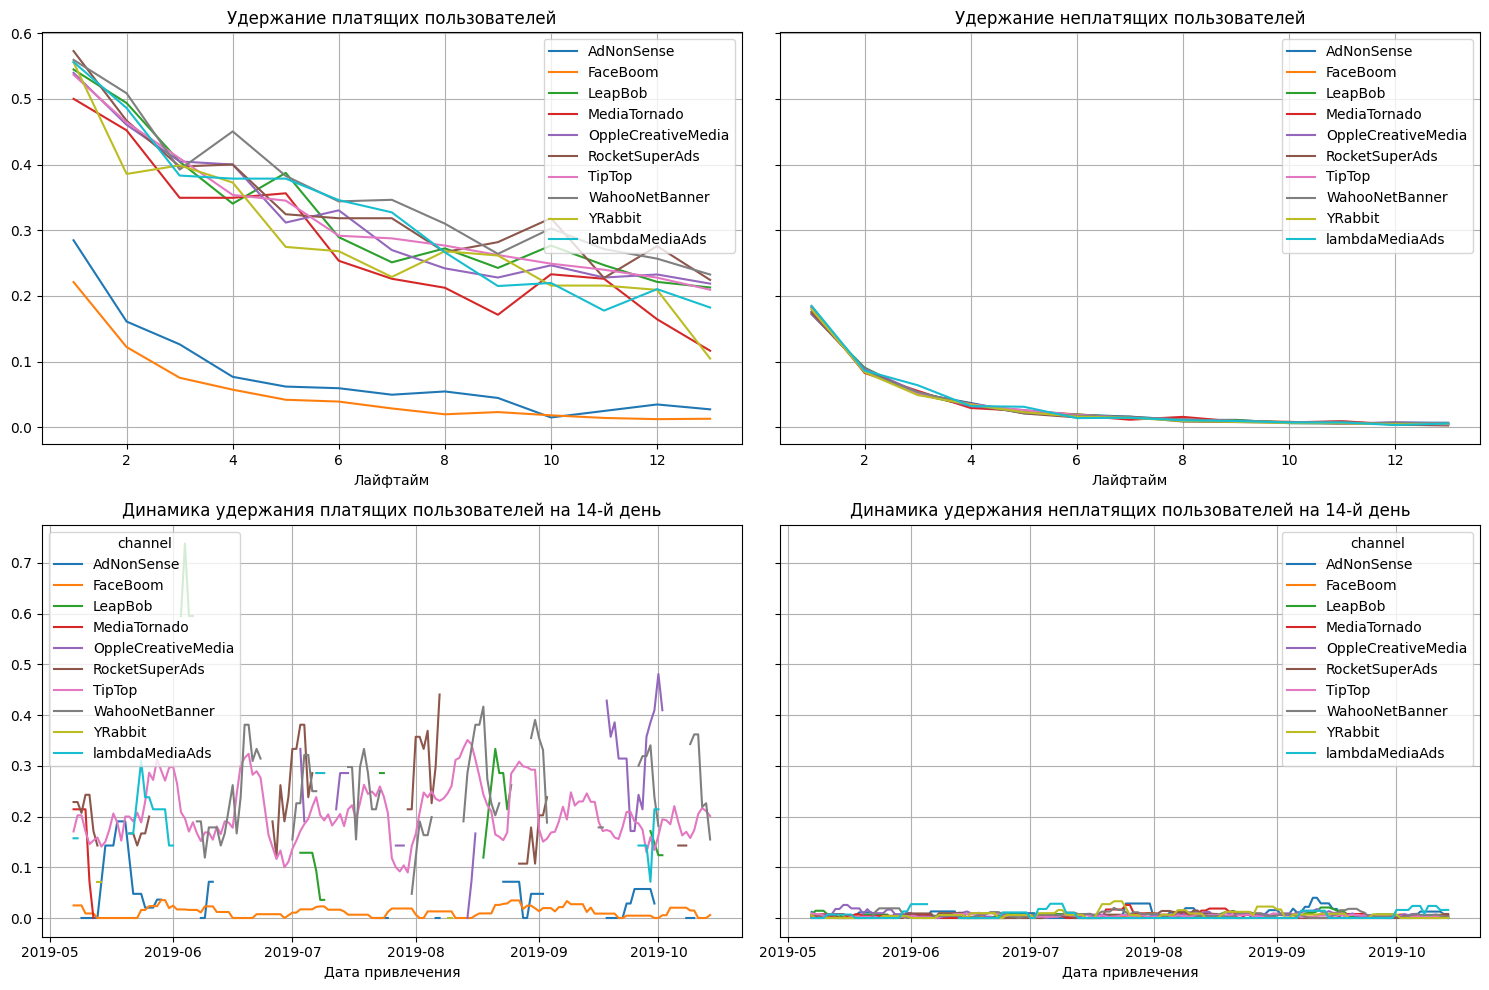

In [47]:
# Проанализирую конверсию в разрезе каналов
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**
* Разбивка по рекламным каналам показывает рост расходов на рекламу (САС) в канале TipTop (второй по числу привлечённых пользователей), при том, что динамика LTV относительно стабильна. Увеличение рекламного бюджета в этом канале тянет вниз экономику всего проекта. По всем остальным каналам бюджет относительно стабилен или незначительно снижается;
* ROI в конце второй недели по 3ём каналам ниже уровня окупаемости, при чём 2 из 3 канала (TipTop и FaceBoom) - являются крупнейшими по числу привлечённых пользователей. Оставшиеся каналы окупаются;
* ROI в динамике относительно стабилен, явно прослеживается снижение только по каналу TipTop. Отдельно стоит отменить всплеск ROI в июле по каналу YRabbit. Учитывая, что расходы на рекламу не снижались, значит дело в существенном росте количества пользователей, привлечённых в июле;
* Конверсия пользователей из каналов FaceBoom и AdNonSense чуть выше, чем в других каналах, но удержание существенно ниже - с учётом неокупаемости этих каналов, необходимо снизить по ним размещение рекламы;
* Каналы YRabbit, MediaTornado и lambdaMediaAds окупаются лучше всего - по ним ROI по итогам двух недель примерно 250%, но показатели конверсии и удержания в каналах YRabbit и MediaTornado проигрывают lambdaMediaAds.

### США - Окупаемость рекламы по рекламным каналам

Так как ROI пользователей из США в целом ниже уровня окупаемости, проанализирую отдельно разбивку на рекламные каналы отдельно по Штатам. 

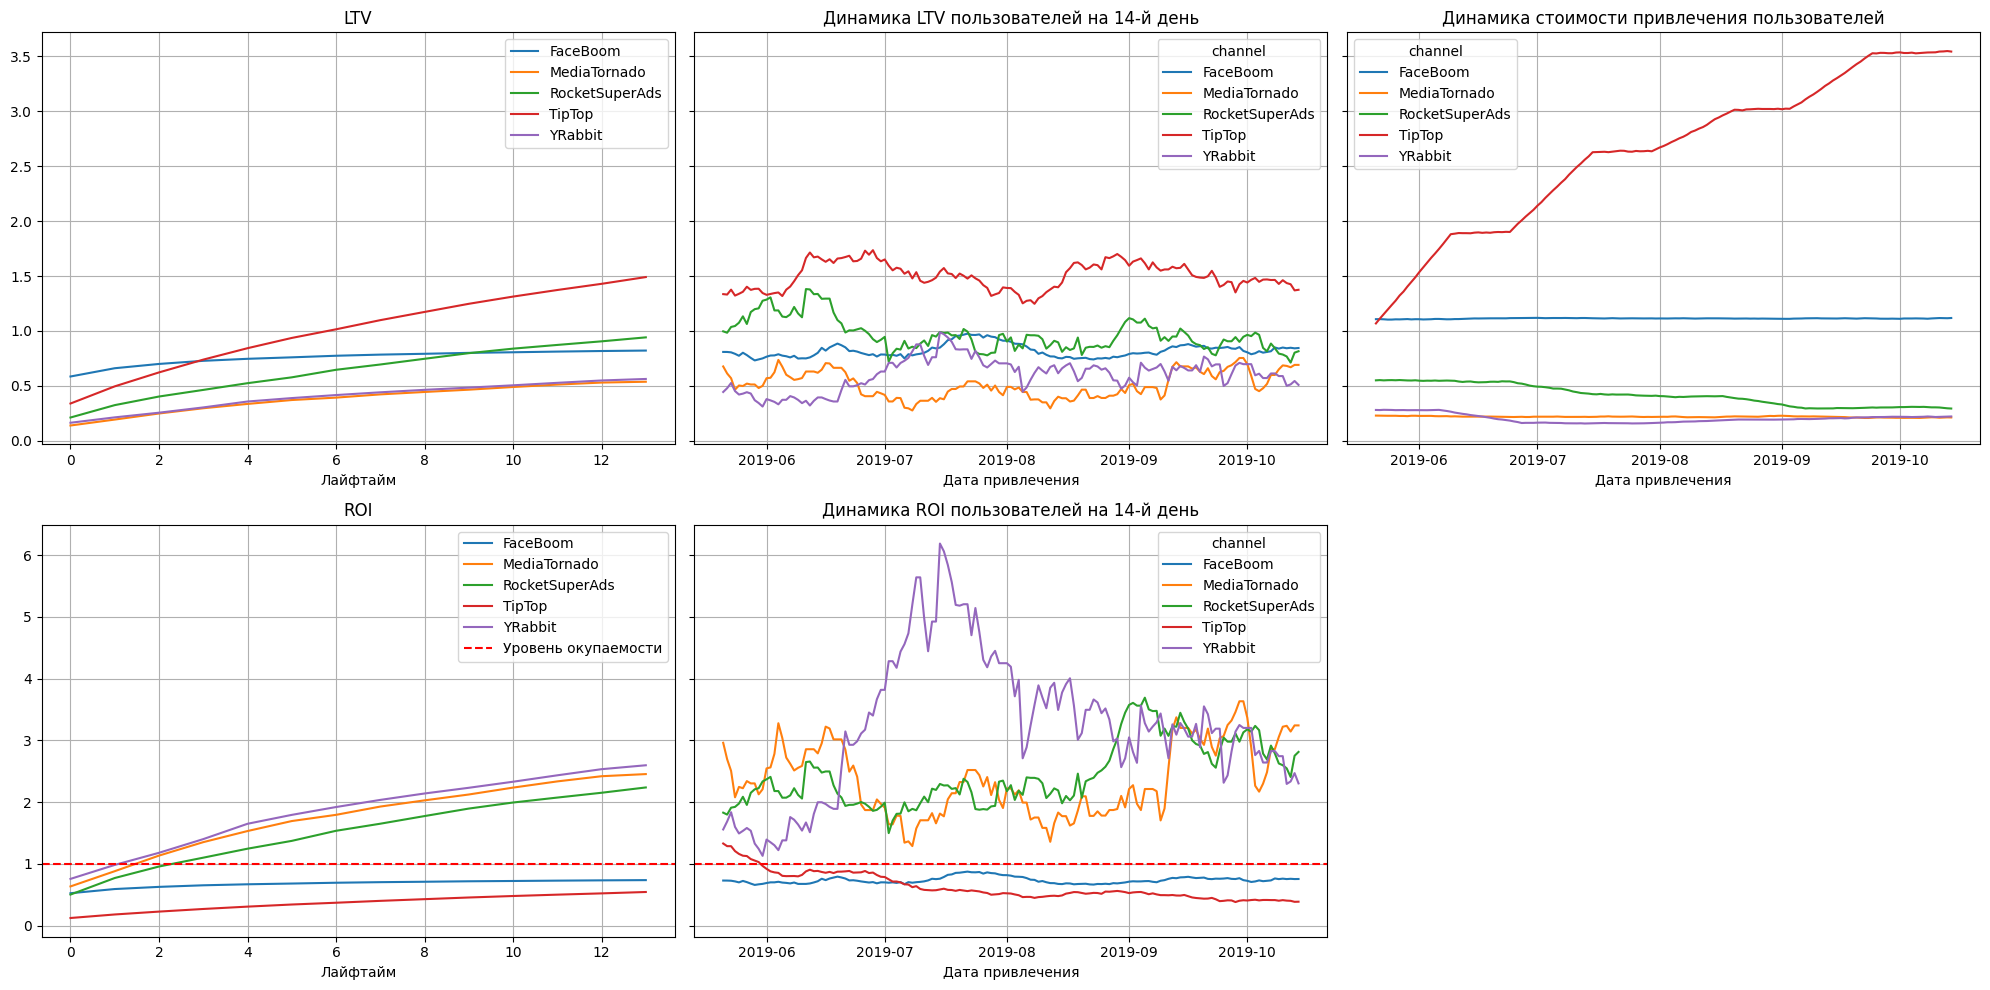

In [48]:
# Добавляю измерение channel
dimensions = ['channel']

# Собираю данные для графиков с помощью функции, в профилях отберу только пользователей из США
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

# Строю графики:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21)

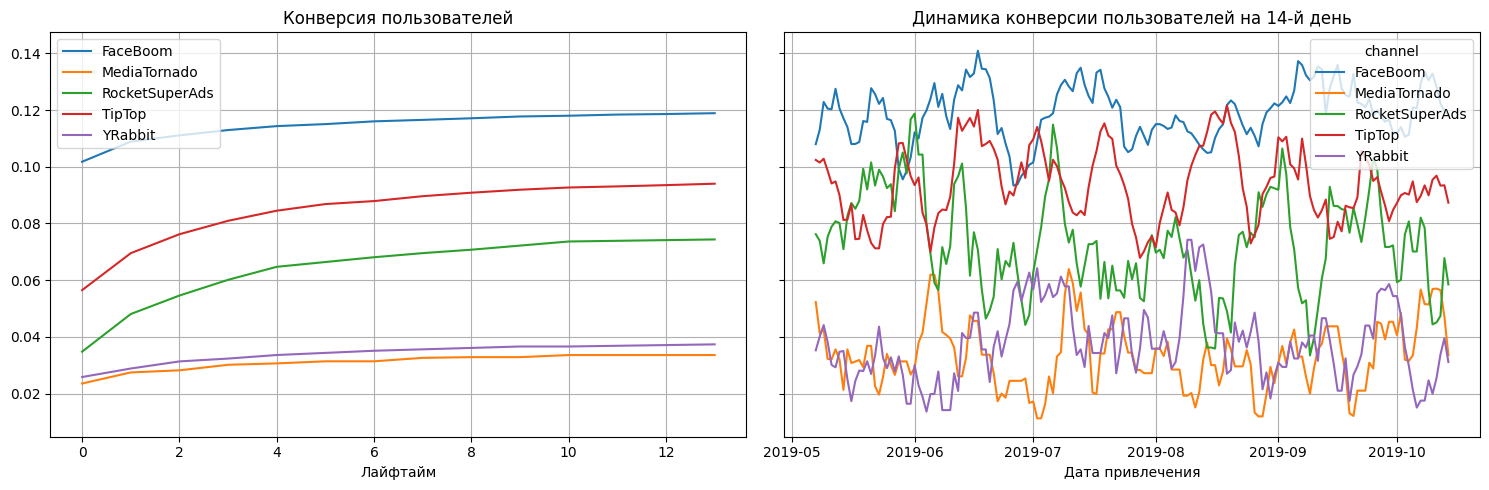

In [49]:
# Проанализирую конверсию в разрезе каналов
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

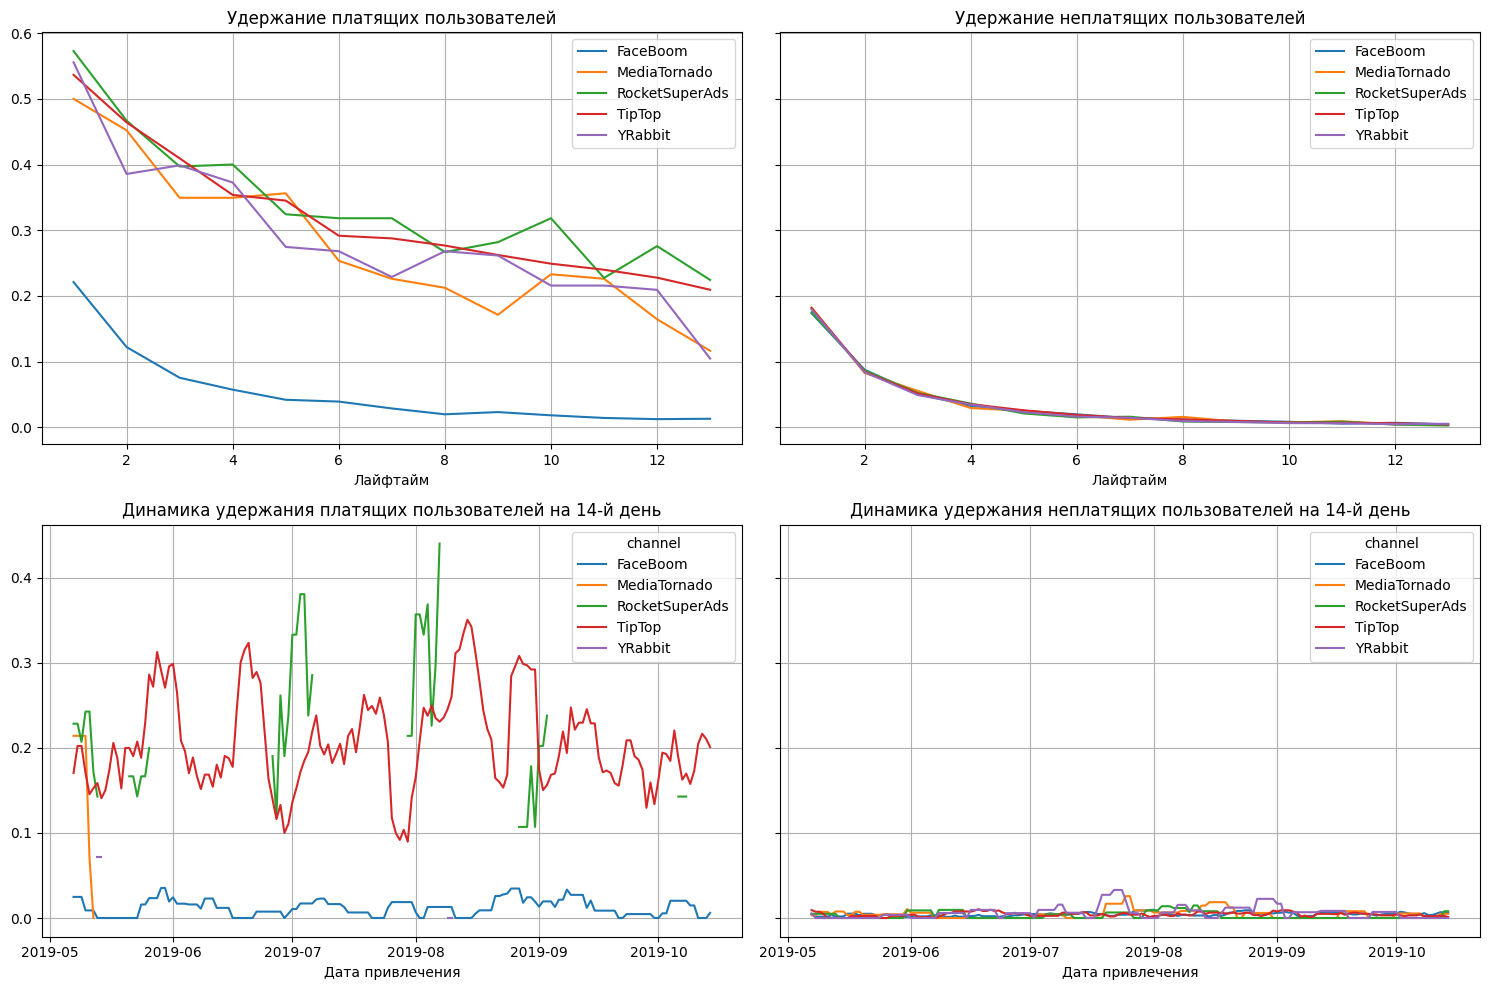

In [50]:
# Проанализирую конверсию в разрезе каналов
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

* Из-за рекламы в каналах FaceBoom и TipTop реклама по всей стране не окупается;
* Несмотря на высокую конверсию в канале FaceBoom, удержание в данном канале низкое;
* Необходимо сфокусировать рекламу на канале RocketSuperAds, так как данный канал окупается, показатель конверсии относительно высокий, а удержание в среднем выше, чем в других каналах.

## Общий вывод
<a id='section_id6'></a>

**Описание данных**

Для проведения анализа использовались 3 датасета - лог о посещении сайта, информация о покупках и информация о расходах на рекламу.

**Предобработка данных**

В ходе предобработки названия столбцов приведены к нижнему регистру, пробелы заменены на нижнее подчёркивание, преобразованы типы данных в отдельных колонках, явных дубликатов не обнаружено.

**Функции для анализа**

Для дальнейшего анализа заданы функции:
* get_profiles - для формирования профилей пользователей
* get_ltv - для расчёта LTV и ROI
* filtered_data - для сглаживания фрейма (использовал 14-ти дневную среднюю скользящую)
* Функция визуализации данных - для графического отображения данных

**Анализ данных**

Пользователи распределяются (по каждой категории в порядке убывания):

1. По 4ём странам - США, Великобритания, Франция и Германия
2. По 4 устройствам - iPhone, Android, PC и Mac
3. По 11 каналам привлечения, 10 из которых платные, 11ый - органический. Среди них 2 канала лидера по числу пользователей FaceBoom и TipTop

### Маркетинг

**Расходы на маркетинг**

Итого на маркетинг компания потратила 105 497 долларов, из них ~82% приходятся на 2 источника - TipTop и FaceBoom.

На графике динамики расходов на маркетинг отражено лидерство двух рекламных каналов. Два канала-лидера имеют схожие тренды по маркетинговым расходам. 

Общая сумма расходов на маркетинг: 105497.30


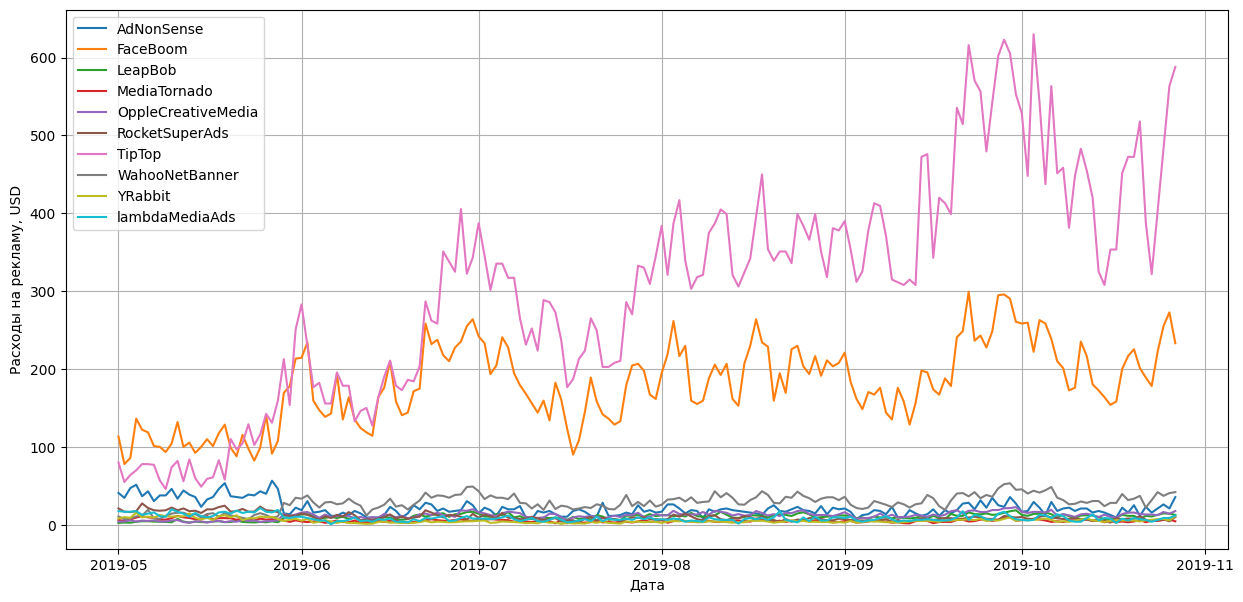

In [51]:
print('Общая сумма расходов на маркетинг: {:.2f}'.format(costs['costs'].sum()))

costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Расходы на рекламу, USD')
plt.show()

**Привлечение одного пользователя**

Средний CAC на одного пользователя по всему проекту без учёта органических клиентов составляет 1.13 USD. При анализе стоимости привлечения одного пользователя выявлено, что САС канала TipTop превышает средний уровень более чем в 2 раза. Стоимость привлечения клиентов во всех остальных каналах ниже среднего значения.

In [52]:
cac.sort_values(by='cost_per_user', ascending=False)

channel  user_id  acquisition_cost  cost_per_user
6               TipTop    19561        54,751.300          2.799
1             FaceBoom    29144        32,445.600          1.113
0           AdNonSense     3880         3,911.250          1.008
9       lambdaMediaAds     2149         1,557.600          0.725
7       WahooNetBanner     8553         5,151.000          0.602
5       RocketSuperAds     4448         1,833.000          0.412
4   OppleCreativeMedia     8605         2,151.250          0.250
8              YRabbit     4312           944.220          0.219
3         MediaTornado     4364           954.480          0.219
2              LeapBob     8553         1,797.600          0.210
10             organic    56439             0.000          0.000

### Окупаемость проекта

Согласно методике компании с расчётом окупаемости на горизонте двух недель, проект в целом не окупается.
Однако при декомпозировании проекта на отдельные факторы (устройства, страна, каналы привлечения) было выявлено:

1. Маркетинговые расходы на устройства iPhone и Mac растут сильнее, чем на Android и PC, а также ROI по первым двум устройствам  ниже порогового значения. Таким образом iPhone и Mac генерируют убыток
2. Рекламный бюджет в разрезе стран растёт в США (есть корреляция с iPhone и Mac), ROI ниже порогового значения, 3 другие страны генерируют прибыль.
3. Маркетинговый затраты в разрезе каналов существенно растут по каналу TipTop, однако динамика LTV по данному каналу и по всем проекту в целом относительно стабильна, конверсия и удержание по каналу не самые лучшие. ROI 3 каналов (2 из них крупнейшие по числу пользователей - FaceBoom и TipTop) ниже порогового значения и генерят убыток, остальные 8 каналов (включая органических пользователей) показывают прибыль.
4. При анализе конверсии, удержания и окупаемости самым оптимальным каналом для размещения рекламы является lambdaMediaAds. 
5. Проанализировав распределение по рекламным каналам отдельно в США обнаружил, что самым оптимальным каналом с точки зрения окупаемости, конверсии и удержания является RocketSuperAds.

**Рекоммендации для отдела маркетинга**

С учётом анализа, необходимо: 
* снизить агрессивный маркетинг в США, в частности снизить рекламную активность в канале TipTop, CAC по которому более чем в 2 раза превышает средний уровень CAC по всему проекту;
* сфокусироваться на размещении рекламы на канале lambdaMediaAds - но продумать стратегию планомерной закупки рекламы на этих платформах;
* в США перераспределить рекламный бюджет на канал RocketSuperAds, но также подходить разумно к планированию рекламных кампаний.